In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 999)
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df_season_play_by_play = pd.read_csv('data/season_play_by_play/pbp_2017.csv')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
season_games = pd.read_csv('data/season_games/games_2017.csv')
season_games['Win'] = season_games['homescore'] > season_games['awayscore']

In [4]:
season_games['Win_Team'] = season_games.apply(lambda x: x['home'] if x['Win'] == True else x['away'], axis=1)

In [5]:
df_season_play_by_play

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2017-09-07,2017090700,1,1,NaN,15:00,15,3600.0,0.0,KC,35.0,35.0,0,73,0.0,NaN,NE,KC,C.Santos kicks 64 yards from KC 35 to NE 1. D....,1,26,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,D.Lewis,NaN,K.Pierre-Louis,D.Harris,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NE,KC,0,None,3,3,3,3,3,0.001374,0.162632,0.004441,0.254179,0.233081,0.003656,0.340639,0.000000,0.0,0.814998,0.194396,NaN,NaN,0.500007,0.499993,0.506018,0.493982,0.500007,0.006011,NaN,NaN,2017
1,2017-09-07,2017090700,1,1,1.0,14:55,15,3595.0,5.0,NE,27.0,73.0,10,0,0.0,0.0,NE,KC,(14:55) NE 12-Brady 18th season as Patriots QB...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Brady,00-0019596,1,Incomplete Pass,Deep,27,0,0,left,0,NaN,NaN,None,0,NaN,NaN,D.Allen,00-0029689,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NE,KC,0,None,3,3,3,3,3,0.001347,0.155819,0.003770,0.243413,0.240728,0.003671,0.351251,0.000000,0.0,1.009395,-0.764068,2.186206,-2.950274,0.506018,0.493982,0.484055,0.515945,0.506018,-0.021963,0.068249,-0.090213,2017
2,2017-09-07,2017090700,1,1,2.0,14:49,15,3589.0,6.0,NE,27.0,73.0,10,8,0.0,0.0,NE,KC,(14:49) T.Brady pass short right to R.Burkhead...,1,8,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Brady,00-0019596,1,Complete,Short,1,7,0,right,0,NaN,NaN,None,0,NaN,NaN,R.Burkhead,00-0030288,1,NaN,NaN,NaN,R.Parker,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NE,KC,0,None,3,3,3,3,3,0.001421,0.181320,0.004977,0.284096,0.222335,0.004009,0.301842,0.000000,0.0,0.245327,0.816847,-0.848627,1.665474,0.484055,0.515945,0.510010,0.489990,0.484055,0.025955,-0.024329,0.050284,2017
3,2017-09-07,2017090700,1,1,3.0,14:14,15,3554.0,35.0,NE,35.0,65.0,2,73,0.0,1.0,NE,KC,(14:14) (Shotgun) J.White left guard to NE 43 ...,1,8,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,J.White,00-0031062,1,left,guard,NaN,None,0,NaN,NaN,NaN,R.Parker,D.Johnson,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NE,KC,0,None,3,3,3,3,3,0.001426,0.160903,0.003032,0.244357,0.213148,0.003585,0.373548,0.000000,0.0,1.062174,1.369456,NaN,NaN,0.510010,0.489990,0.552982,0.447018,0.510010,0.042972,NaN,NaN,2017
4,2017-09-07,2017090700,1,1,1.0,13:52,14,3532.0,22.0,NE,43.0,57.0,10,19,0.0,0.0,NE,KC,"(13:52) (No Huddle, Shotgun) J.White up the mi...",1,3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,J.White,00-0031062,1,middle,NaN,NaN,None,0,NaN,NaN,NaN,E.Berry,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NE,KC,0,None,3,3,3,3,3,0.001206,0.105299,0.000968,0.163717,0.297028,0.003613,0.428168,0.000000,0.0,2.431630,-0.238038,NaN,NaN,0.552982,0.447018,0.546975,0.453025,0.552982,-0.006007,NaN,NaN,2017
5,2017-09-07,2017090700,1,1,2.0,13:26,14,3506.0,26.0,NE,46.0,54.0,7,38,0.0,1.0,NE,KC,"(13:26) (No Huddle, Shotgun

In [6]:
fourth_down = df_season_play_by_play[df_season_play_by_play['down'] == 4]

In [7]:
fourth_down = fourth_down[['GameID', 'posteam', 'Drive', 'yrdline100', 
                           'FirstDown', 'DefensiveTeam', 'Yards.Gained', 
                           'Touchdown', 'RushAttempt', 'Reception', 
                           'FieldGoalResult', 'FieldGoalDistance', 'PlayType','qtr']]

In [8]:
fourth_down

,GameID,posteam,Drive,yrdline100,FirstDown,DefensiveTeam,Yards.Gained,Touchdown,RushAttempt,Reception,FieldGoalResult,FieldGoalDistance,PlayType,qtr
22,2017090700,NE,3,10.0,1.0,KC,0,0,1,0,NaN,NaN,Run,1
46,2017090700,NE,5,8.0,0.0,KC,0,0,0,0,Good,25.0,Field Goal,2
51,2017090700,KC,6,54.0,1.0,NE,0,0,0,0,NaN,NaN,Punt,2
71,2017090700,KC,8,71.0,1.0,NE,0,0,0,0,NaN,NaN,Punt,2
75,2017090700,NE,9,56.0,1.0,KC,0,0,0,0,NaN,NaN,Punt,2
105,2017090700,KC,12,56.0,1.0,NE,0,0,0,0,NaN,NaN,Punt,3
111,2017090700,NE,13,74.0,1.0,KC,0,0,0,0,NaN,NaN,Punt,3
121,2017090700,NE,15,49.0,1.0,KC,0,0,0,0,NaN,NaN,Punt,3
125,2017090700,KC,16,85.0,1.0,NE,0,0,0,0,NaN,NaN,Punt,3
136,2017090700,KC,18,89.0,0.0,NE,3,0,0,0,NaN,NaN,No Play,3


In [9]:
fourth_down = pd.concat([fourth_down, pd.get_dummies(fourth_down['PlayType'])], axis=1)

In [10]:
success_fourth_down = fourth_down[fourth_down['Run'] == 1]['FirstDown']
sum(success_fourth_down)/len(success_fourth_down)

0.8342857142857143

In [11]:
success_fourth_down = fourth_down[fourth_down['Pass'] == 1]['FirstDown']
sum(success_fourth_down)/len(success_fourth_down)

0.84879725085910651

In [12]:
no_punt = fourth_down[fourth_down['Punt'] == 0]

In [32]:
def plot_fourth_down():
    merged = pd.merge(season_games[['GameID', 'Win_Team']], 
                      no_punt[['GameID', 'FirstDown', 'posteam', 'Run', 'Pass']], 
                      on='GameID', how='outer')
    group = merged.groupby(by=['GameID', 'posteam'], axis=0).sum().FirstDown
    group = pd.DataFrame(group)
    group = group.reset_index()
    fumbles_2017 = pd.merge(group,season_games,on='GameID')
    fumbles_2017.drop('Win', axis=1, inplace=True)

    fumbles_2017['Win'] = fumbles_2017.apply(lambda x: x.posteam == x.Win_Team, axis=1)
    team_fg_2017 = fumbles_2017.groupby(['posteam','FirstDown']).mean()
    teams = team_fg_2017.index.get_level_values(0).unique()
    fig, axs = plt.subplots(32, figsize=(10,4*len(teams)))
    for i, team in enumerate(teams):
        axs[i].plot(team_fg_2017.loc[team]['Win'])
        axs[i].set_title(team)

    fig, ax = plt.subplots()
    ax.plot(fumbles_2017.groupby('FirstDown').mean()['Win'])
    ax.set_xlabel('FirstDown')
    ax.set_ylabel('Probability of Winning')
    ax.set_title('Probability of Winning vs. # of Successful Fourth Downs')

In [15]:
merged = pd.merge(season_games[['GameID', 'Win_Team']], 
                  df_season_play_by_play[['GameID', 'HomeTeam', 
                                          'AwayTeam', 'Fumble', 'posteam']],
                  on='GameID', how='outer')

group = merged.groupby(by=['GameID', 'posteam'], axis=0).sum().Fumble
group = pd.DataFrame(group)
group = group.reset_index()
fumbles_2017 = pd.merge(group,season_games,on='GameID')
fumbles_2017.drop('Win', axis=1, inplace=True)
fumbles_2017['Win'] = fumbles_2017.apply(lambda x: x.posteam == x.Win_Team, axis=1)


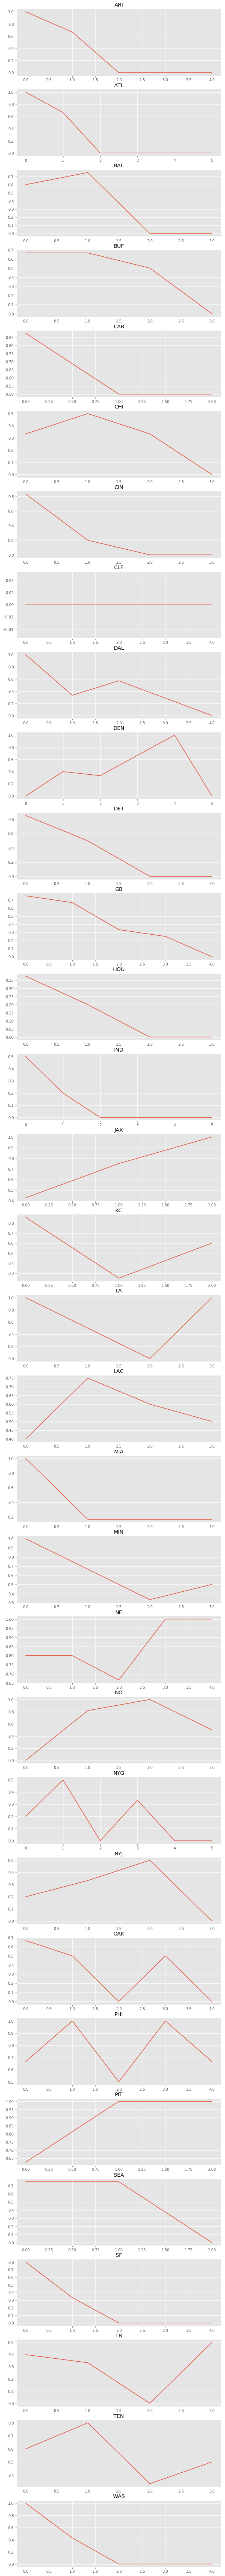

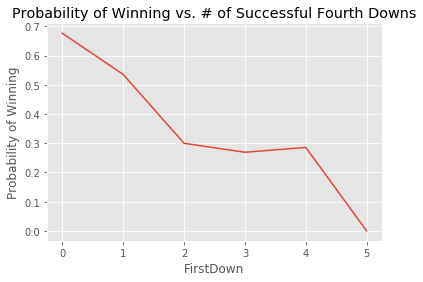

In [35]:
plot_fourth_down()
plt.savefig('fourth_down_graph.png')

In [17]:
each_team = pd.DataFrame(fumbles_2017.groupby(['posteam', 'Fumble']).mean()['Win']).reset_index()

In [18]:
def plot_binary_football(compare_col, team_col):
    merged = pd.merge(season_games[['GameID', 'Win_Team']], 
                      df_season_play_by_play[['GameID', 'HomeTeam', 
                                              'AwayTeam', compare_col, team_col]], 
                      on='GameID', how='outer')
    group = merged.groupby(by=['GameID', team_col], axis=0).sum()[compare_col]
    group = pd.DataFrame(group)
    group = group.reset_index()
    fumbles_2017 = pd.merge(group,season_games,on='GameID')

    fumbles_2017['Win'] = fumbles_2017.apply(lambda x: x[team_col] == x.Win_Team, axis=1)
    team_fg_2017 = fumbles_2017.groupby([team_col,compare_col]).mean()
    teams = team_fg_2017.index.get_level_values(0).unique()
    fig, axs = plt.subplots(32, figsize=(10,4*len(teams)))
    for i, team in enumerate(teams):
        axs[i].plot(team_fg_2017.loc[team]['Win'])
        axs[i].set_title(team)

    fig, ax = plt.subplots()
    ax.plot(fumbles_2017.groupby(compare_col).mean()['Win'])
    ax.set_xlabel(compare_col)
    ax.set_ylabel('Probability of Winning')
    ax.set_title(f'Probability of Winning vs. # of {compare_col}')

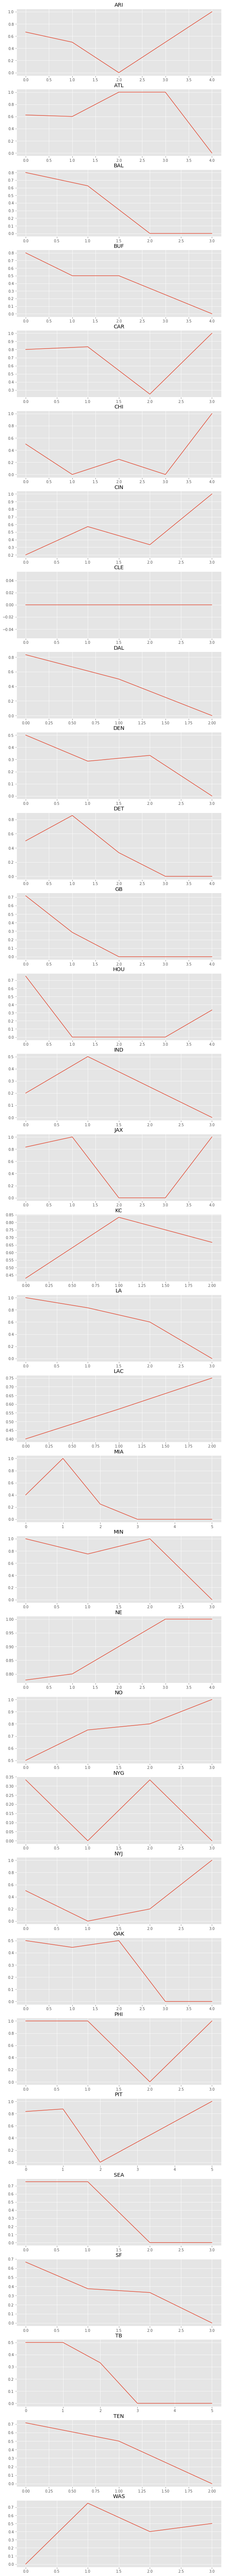

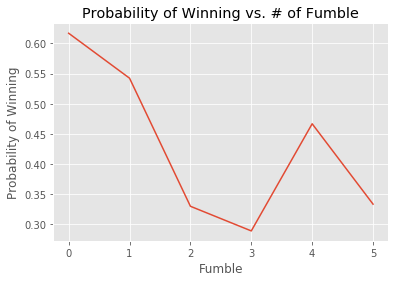

In [19]:
plot_binary_football('Fumble', 'posteam')

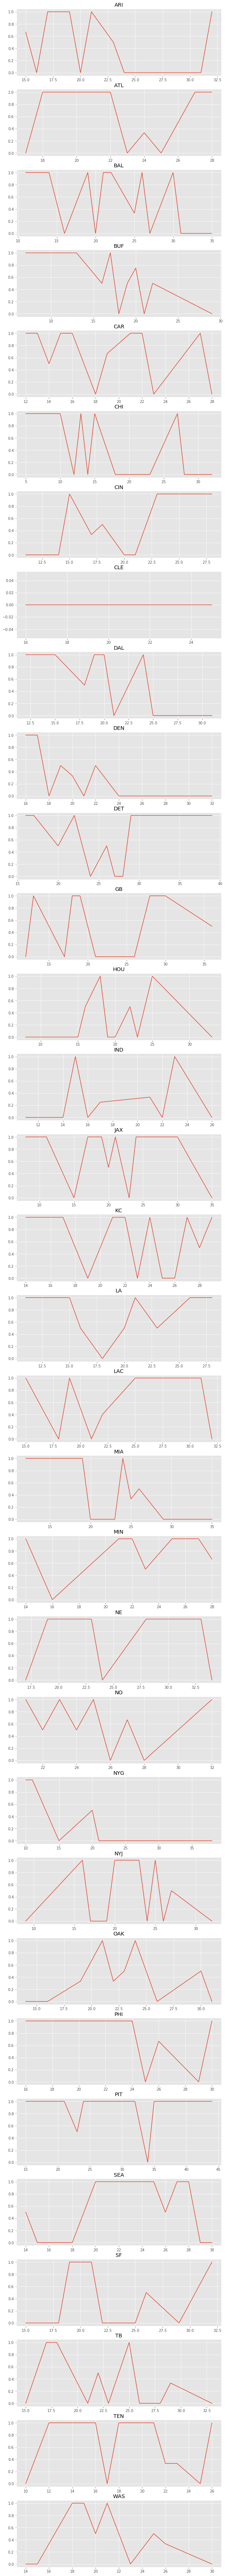

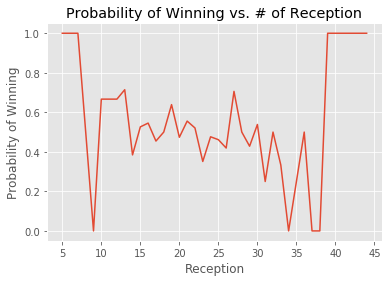

In [20]:
plot_binary_football('Reception', 'posteam')

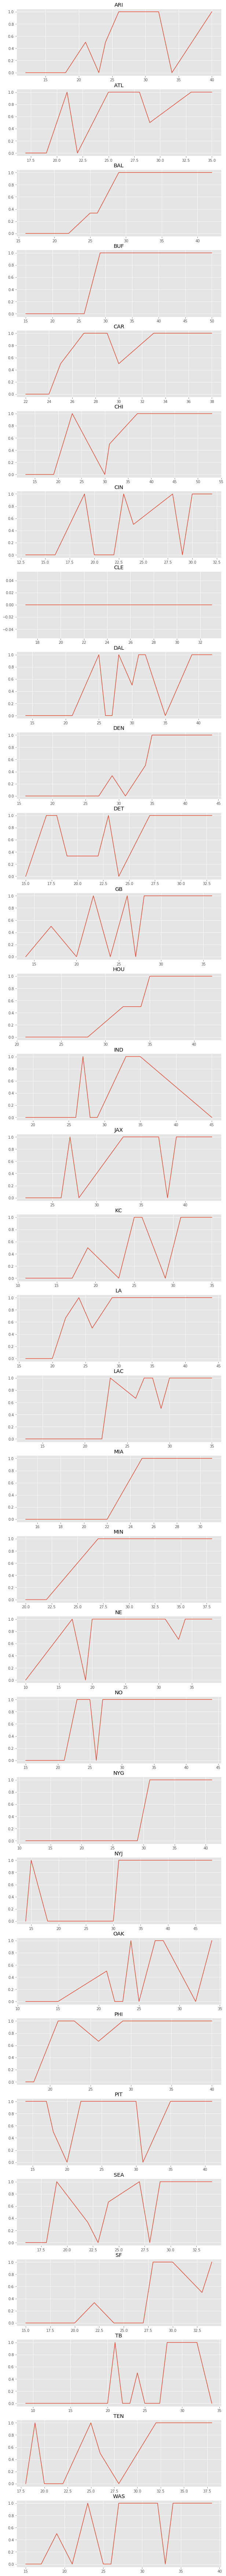

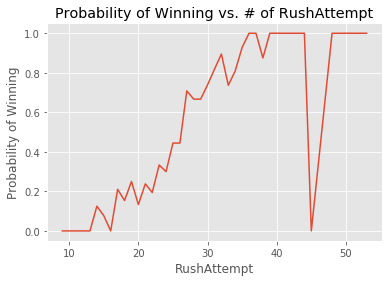

In [21]:
plot_binary_football('RushAttempt', 'posteam')

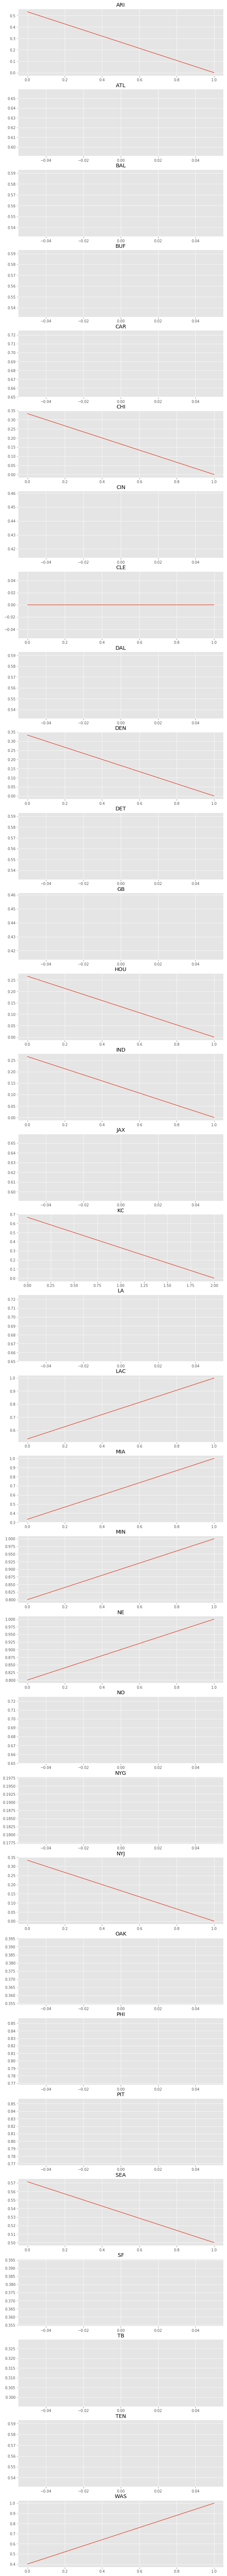

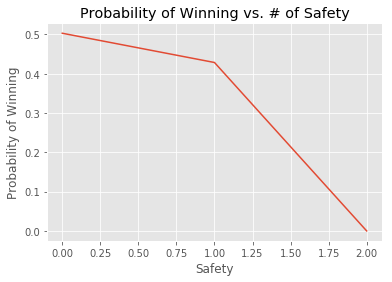

In [22]:
plot_binary_football('Safety', 'posteam')

In [23]:
def plot_binary_football(compare_col, team_col):
    merged = pd.merge(season_games[['GameID', 'Win_Team']], 
                      df_season_play_by_play[['GameID', 'HomeTeam', 
                                              'AwayTeam', compare_col, team_col]], 
                      on='GameID', how='outer')
    group = merged.groupby(by=['GameID', team_col], axis=0).sum()[compare_col]
    group = pd.DataFrame(group)
    group = group.reset_index()
    fumbles_2017 = pd.merge(group,season_games,on='GameID')
    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    fumbles_2017['Win'] = fumbles_2017.apply(lambda x: x[team_col] == x.Win_Team, axis=1)
    team_fg_2017 = fumbles_2017.groupby([team_col,compare_col]).mean()
    teams = team_fg_2017.index.get_level_values(0).unique()
    fig, axs = plt.subplots(figsize=(10,4*len(teams)))
    
    for i, team in enumerate(teams):
        
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.
        if i < 20:
            axs.plot(team_fg_2017.loc[team]['Win'], lw=2.5, color=tableau20[i]) 
        else:
            axs.plot(team_fg_2017.loc[team]['Win'], lw=2.5, color=tableau20[i-15]) 


    fig, ax = plt.subplots()
    ax.plot(fumbles_2017.groupby(compare_col).mean()['Win'])
    ax.set_xlabel(compare_col)
    ax.set_ylabel('Probability of Winning')
    ax.set_title(f'Probability of Winning vs. # of {compare_col}')

In [26]:
team_fg_2017 = fumbles_2017.groupby(['posteam','Fumble']).mean()

In [27]:
x = []
y = []
for team in team_fg_2017.reset_index()['posteam'].unique():
    x_row = []
    y_row = []
    for idx, row in team_fg_2017.reset_index().iterrows():
        if row['posteam'] == team:
            x_row.append(row['Fumble'])
            y_row.append(row['Win'])
    x.append(list(range(0,6)))
    while len(y_row) < 5:
        y_row.append(0)
    y.append(y_row)

In [28]:
import matplotlib
lst = []
for name, hex in matplotlib.colors.cnames.items():
    lst.append(name)

In [29]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

title = 'Num of Fumbles vs. Probability of Winning'

labels = ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS']

colors = lst[0:32]

mode_size = 8

line_size = 4

x_data = x

y_data = y

traces = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
          10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25, 
          26, 27, 28, 29, 30, 31]:
    traces.append(go.Scatter(
        hovertext=labels[i],
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=lst[i], width=line_size),
        connectgaps=True, 
    ))
    
    traces.append(go.Scatter(
        x=[x_data[0], x_data[len(x_data[i])]],
        y=[y_data[0], y_data[len(y_data[i])]],
        mode='markers',
        marker=dict(color=lst[i], size=mode_size)
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, lst[0:32]):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.00, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.100, y=y_trace[4],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[4]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
plotly.offline.plot({
    "data": traces,
    "layout": layout
})

'file:///Users/elisereppond/galvanize/Data/nflscrapR-data/temp-plot.html'

In [51]:
fumbles_2017

,GameID,posteam,Fumble,date,home,away,homescore,awayscore,Season,Win_Team,Win
0,2017090700,KC,1,2017-09-07,NE,KC,27,42,2017,KC,True
1,2017090700,NE,1,2017-09-07,NE,KC,27,42,2017,KC,False
2,2017091000,BUF,1,2017-09-10,BUF,NYJ,21,12,2017,BUF,True
3,2017091000,NYJ,0,2017-09-10,BUF,NYJ,21,12,2017,BUF,False
4,2017091001,ATL,0,2017-09-10,CHI,ATL,17,23,2017,ATL,True
5,2017091001,CHI,2,2017-09-10,CHI,ATL,17,23,2017,ATL,False
6,2017091002,BAL,0,2017-09-10,CIN,BAL,0,20,2017,BAL,True
7,2017091002,CIN,1,2017-09-10,CIN,BAL,0,20,2017,BAL,False
8,2017091003,CLE,0,2017-09-10,CLE,PIT,18,21,2017,PIT,False
9,2017091003,PIT,1,2017-09-10,CLE,PIT,18,21,2017,PIT,True
